## Comparing the Approximate ISORANK method with HubAlign and FINAL

**Hubalign:** Hashemifar, Somaye, and Jinbo Xu. "Hubalign: an accurate and efficient method for global alignment of protein–protein interaction networks." Bioinformatics 30.17 (2014): i438-i444.

**FINAL:** Zhang, Si, and Hanghang Tong. "Final: Fast attributed network alignment." Proceedings of the 22nd ACM SIGKDD international conference on knowledge discovery and data mining. 2016.

In [7]:
import seaborn as sns
import numpy as np
import pandas as pd

### Get the approximate ISORANK results

In [12]:
dfai_a = pd.read_csv("/cluster/home/kdevko01/Approx_ISORANK/data/isorank_matching.tsv",
                    sep = "\t")
dfai_a

,org1,org2,norm(R-R0),norm(R-R1),sim_with_isorank-R(R0),sim_with_isorank-R(R1),Edge Correctness (R0),Edge Correctness (R1),Edge Correctness (R),Symmetric substructure (S^3-R0),...,FC-molecular_function(R0),FC-biological_process(R0),FC-cellular_component(R0),FC-molecular_function(R1),FC-biological_process(R1),FC-cellular_component(R1),FC-molecular_function(R2),FC-biological_process(R2),FC-cellular_component(R2),alpha
0,fly,bakers,0.000773,0.000237,0.4965,0.7990,0.070058,0.175550,0.178207,0.021917,...,0.504935,0.261213,0.542119,0.518200,0.266976,0.546234,0.513379,0.267791,0.549580,0.2
1,fly,bakers,0.001012,0.000173,0.5015,0.7975,0.068267,0.178248,0.193526,0.021793,...,0.505886,0.262408,0.543859,0.518666,0.266757,0.546707,0.514000,0.267278,0.548055,0.4
2,fly,bakers,0.000947,0.000088,0.5075,0.8100,0.074088,0.178935,0.185699,0.021757,...,0.513322,0.260714,0.538923,0.515298,0.266032,0.546564,0.516975,0.267592,0.550457,0.6
3,fly,bakers,0.000613,0.000026,0.5080,0.8370,0.070332,0.175104,0.181375,0.021336,...,0.512444,0.263317,0.541719,0.513329,0.265333,0.547871,0.515289,0.267101,0.550062,0.8
4,fly,mouse,0.001025,0.000374,0.7660,0.8975,0.029534,0.070016,0.074201,0.034507,...,0.570287,0.268598,0.579422,0.567837,0.267446,0.582338,0.567169,0.267018,0.584271,0.2
5,fly,mouse,0.001306,0.000255,0.7880,0.9200,0.028313,0.071567,0.072688,0.035199,...,0.571416,0.268254,0.584188,0.570264,0.268258,0.584228,0.567977,0.268246,0.583725,0.4
6,fly,mouse,0.001208,0.000121,0.8105,0.9410,0.028491,0.073374,0.072936,0.035874,...,0.574128,0.267876,0.579008,0.573517,0.269937,0.586186,0.570199,0.269391,0.583203,0.6
7,fly,mouse,0.000775,0.000032,0.8330,0.9575,0.028662,0.069547,0.070062,0.034106,...,0.575365,0.267585,0.580354,0.573456,0.270583,0.586456,0.570962,0.270258,0.585723,0.8
8,fly,rat,0.003400,0.001533,0.3550,0.4750,0.018774,0.037968,0.043938,0.020989,...,0.494451,0.191027,0.428228,0.436439,0.172323,0.399145,0.386566,0.155242,0.371940,0.2
9,fly,rat,0.003908,0.000857,0.3650,0.4985,0.017554,0.036033,0.047573,0.020019,...,0.494513,0.190714,0.428398,0.434187,0.170724,0.400272,0.389464,0.156695,0.371154,0.4


In [37]:
dfai = dfai_a.loc[dfai_a["alpha"].apply(lambda x : x == 0.6), :]
dfai = dfai.iloc[:, [0, 1, 6, 9, 12, 15, 16, 17]]
dfai.columns = ["Species A",
               "Species B",
               "edge correctness",
               "symmetric_substructure",
               "lccs",
               "FC(mf)",
               "FC(bp)",
               "FC(cc)"]
dfai = dfai.iloc[:, [0, 1, 2, 4, 3, 5, 6, 7]]
dfai.loc[dfai["Species A"] > dfai["Species B"], ["Species A", "Species B"]] = dfai.loc[dfai["Species A"] > dfai["Species B"], ["Species B", "Species A"]].values
dfai = dfai.sort_values(by=["Species A", "Species B"])
dfai["type"] = "A-ISORANK"
dfai

,Species A,Species B,edge correctness,lccs,symmetric_substructure,FC(mf),FC(bp),FC(cc),type
2,bakers,fly,0.074088,695,0.021757,0.513322,0.260714,0.538923,A-ISORANK
14,bakers,human,0.213715,1174,0.058031,0.595207,0.361614,0.502686,A-ISORANK
30,bakers,mouse,0.089620,389,0.019466,0.515291,0.264904,0.525856,A-ISORANK
38,bakers,rat,0.107773,426,0.018186,0.477499,0.215697,0.409277,A-ISORANK
18,fly,human,0.063847,21,0.051565,0.630536,0.334539,0.585266,A-ISORANK
6,fly,mouse,0.028491,15,0.035874,0.574128,0.267876,0.579008,A-ISORANK
10,fly,rat,0.015019,53,0.021193,0.495021,0.190414,0.428872,A-ISORANK
22,human,mouse,0.086272,158,0.069031,0.661401,0.347836,0.575433,A-ISORANK
26,human,rat,0.018938,76,0.034759,0.622408,0.308425,0.464256,A-ISORANK
34,mouse,rat,0.041321,57,0.076911,0.613179,0.297277,0.536556,A-ISORANK


## Get the HubAlign results

In [38]:
dfhb = pd.read_csv("hubalign/output.tsv", sep = "\t")
dfhb.loc[dfhb["Species A"] > dfhb["Species B"], ["Species A", "Species B"]] = dfhb.loc[dfhb["Species A"] > dfhb["Species B"], 
                                                                                       ["Species B", "Species A"]].values

dfhb = dfhb.sort_values(by=["Species A", "Species B"])
dfhb["type"] = "HubAlign"
dfhb

,Species A,Species B,edge correctness,lccs,symmetric_substructure,FC(mf),FC(bp),FC(cc),type
5,bakers,fly,0.007483,2,0.004559,0.088462,NaN,0.149725,HubAlign
3,bakers,human,0.027452,55,0.008496,0.100000,0.082508,0.361905,HubAlign
4,bakers,mouse,0.001999,5,0.001468,NaN,NaN,NaN,HubAlign
0,fly,human,0.030029,9,0.002285,NaN,NaN,NaN,HubAlign
2,fly,mouse,0.162463,1019,0.093059,0.085714,0.084392,NaN,HubAlign
1,human,mouse,0.014085,5,0.000602,0.087420,0.092003,0.243175,HubAlign


## Get Final Results

In [39]:
dffin = pd.read_csv("FINAL-KDD-16/output.tsv", sep = ",")
dffin.loc[dffin["Species A"] > dffin["Species B"], ["Species A", "Species B"]] = dffin.loc[dffin["Species A"] > dffin["Species B"], 
                                                                                       ["Species B", "Species A"]].values
dffin = dffin.sort_values(by = ["Species A", "Species B"])
dffin["type"] = "FINAL"
dffin

,Species A,Species B,edge correctness,lccs,symmetric_substructure,FC(mf),FC(bp),FC(cc),type
7,bakers,fly,0.052663,14,0.047479,NaN,NaN,NaN,FINAL
6,bakers,human,0.219403,543,0.150238,NaN,NaN,NaN,FINAL
8,bakers,mouse,0.027963,17,0.026624,NaN,NaN,NaN,FINAL
9,bakers,rat,0.013049,22,0.011878,NaN,NaN,NaN,FINAL
0,fly,human,0.207817,16,0.032945,NaN,NaN,NaN,FINAL
2,fly,mouse,0.115345,5,0.049015,NaN,NaN,NaN,FINAL
4,fly,rat,0.018738,2,0.009505,NaN,NaN,NaN,FINAL
1,human,mouse,0.205079,72,0.051140,NaN,NaN,NaN,FINAL
3,human,rat,0.082579,23,0.017108,NaN,NaN,NaN,FINAL
5,mouse,rat,0.125250,48,0.046260,NaN,NaN,NaN,FINAL


## Combine all

In [41]:
dfall = pd.concat([dfai, dfhb, dffin]).reset_index(drop = True)
dfall

,Species A,Species B,edge correctness,lccs,symmetric_substructure,FC(mf),FC(bp),FC(cc),type
0,bakers,fly,0.074088,695,0.021757,0.513322,0.260714,0.538923,A-ISORANK
1,bakers,human,0.213715,1174,0.058031,0.595207,0.361614,0.502686,A-ISORANK
2,bakers,mouse,0.089620,389,0.019466,0.515291,0.264904,0.525856,A-ISORANK
3,bakers,rat,0.107773,426,0.018186,0.477499,0.215697,0.409277,A-ISORANK
4,fly,human,0.063847,21,0.051565,0.630536,0.334539,0.585266,A-ISORANK
5,fly,mouse,0.028491,15,0.035874,0.574128,0.267876,0.579008,A-ISORANK
6,fly,rat,0.015019,53,0.021193,0.495021,0.190414,0.428872,A-ISORANK
7,human,mouse,0.086272,158,0.069031,0.661401,0.347836,0.575433,A-ISORANK
8,human,rat,0.018938,76,0.034759,0.622408,0.308425,0.464256,A-ISORANK
9,mouse,rat,0.041321,57,0.076911,0.613179,0.297277,0.536556,A-ISORANK


## Plot edge correctness

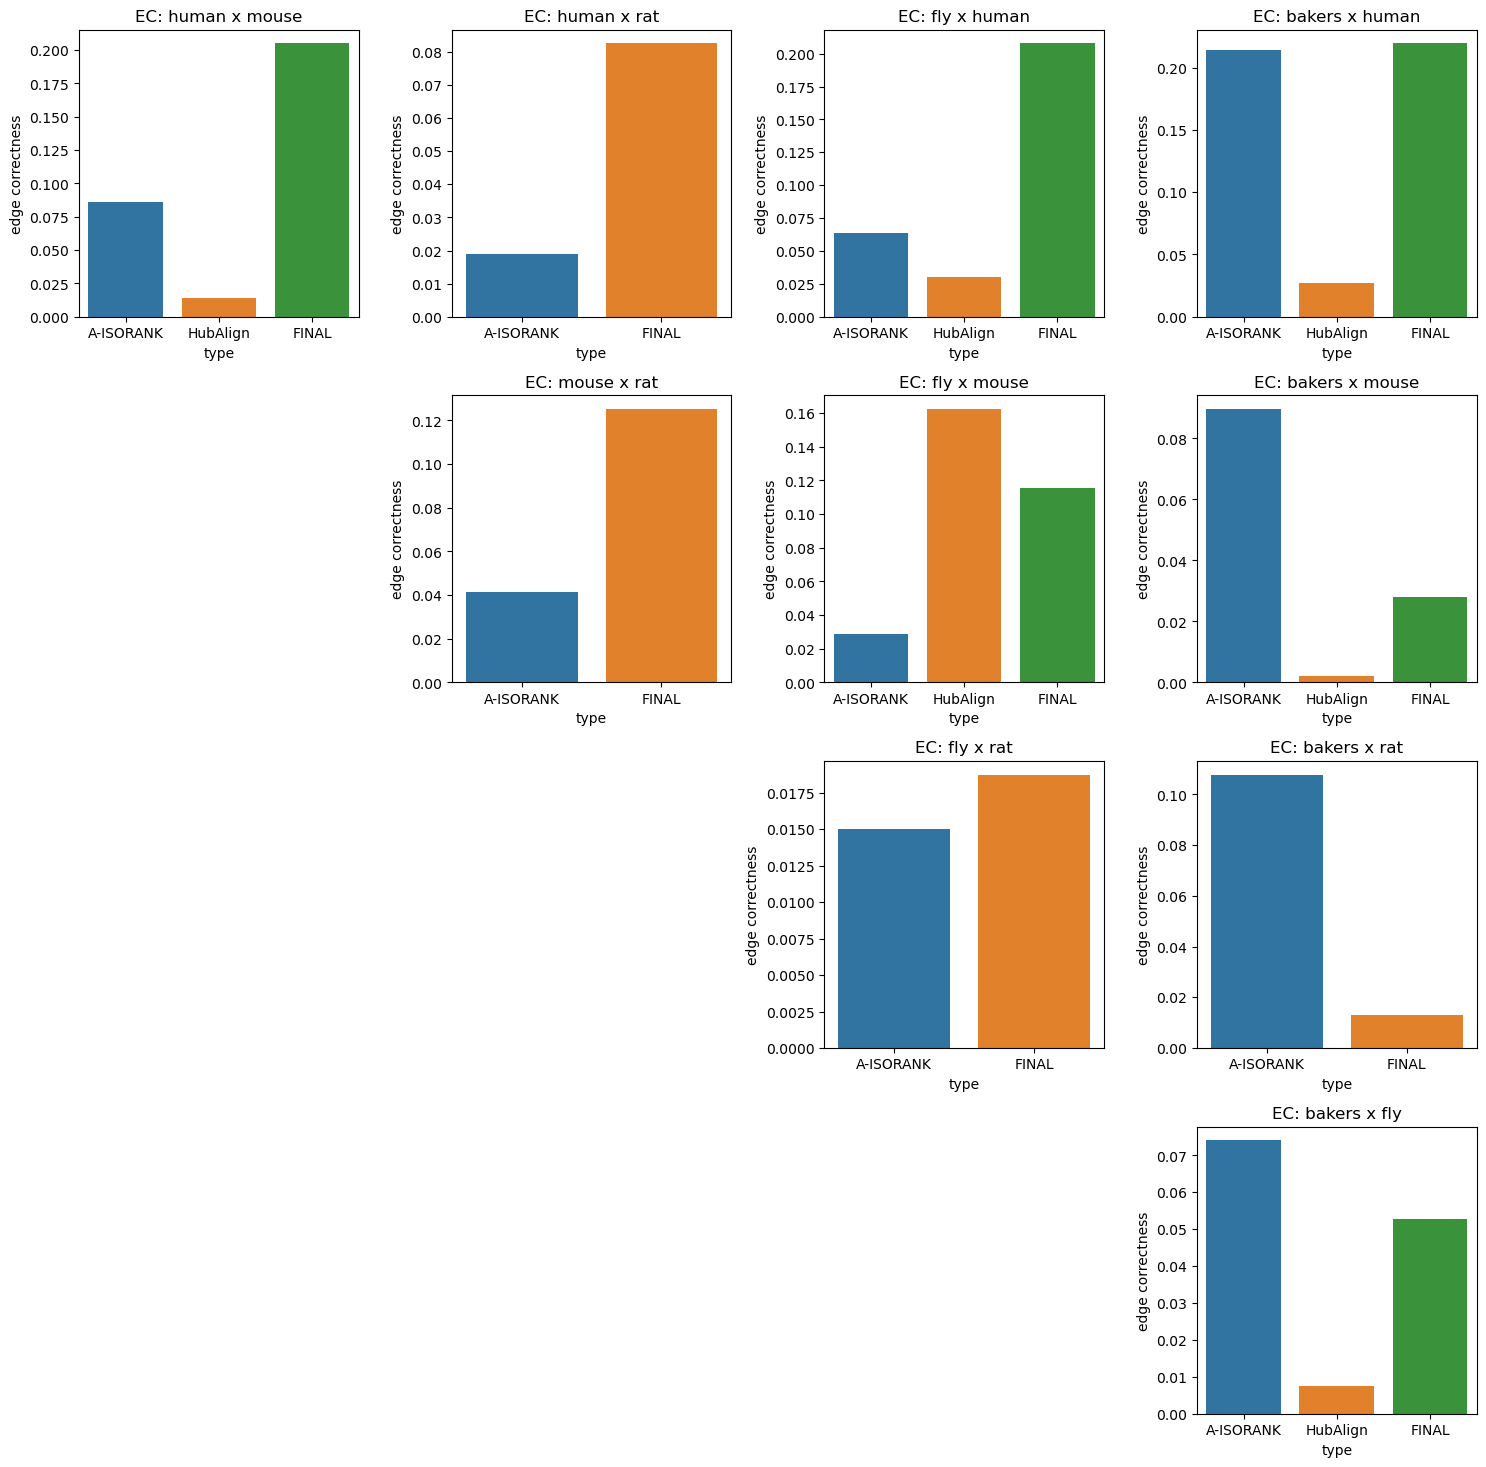

In [50]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(5, 5, figsize=(18, 18))
species = ["human", "mouse", "rat",
          "fly", "bakers"]
for i in range(5):
    for j in range(5):
        if i >= j:
            ax[i, j].set_visible(False)
            continue
        spA = species[i]
        spB = species[j]
        
        if spA > spB:
            spA, spB = spB, spA
        
        dfsp = dfall.loc[dfall.iloc[:, [0,1]].apply(
        lambda x: x["Species A"] == spA and x["Species B"] == spB, axis = 1),
                         :
                        ]
        ax[i, j].set_title(f"EC: {spA} x {spB}")
        sns.barplot(dfsp.iloc[:, [2, 8]], x = "type", y = "edge correctness", ax= ax[i, j])
        
plt.tight_layout()

## Plot LCCS

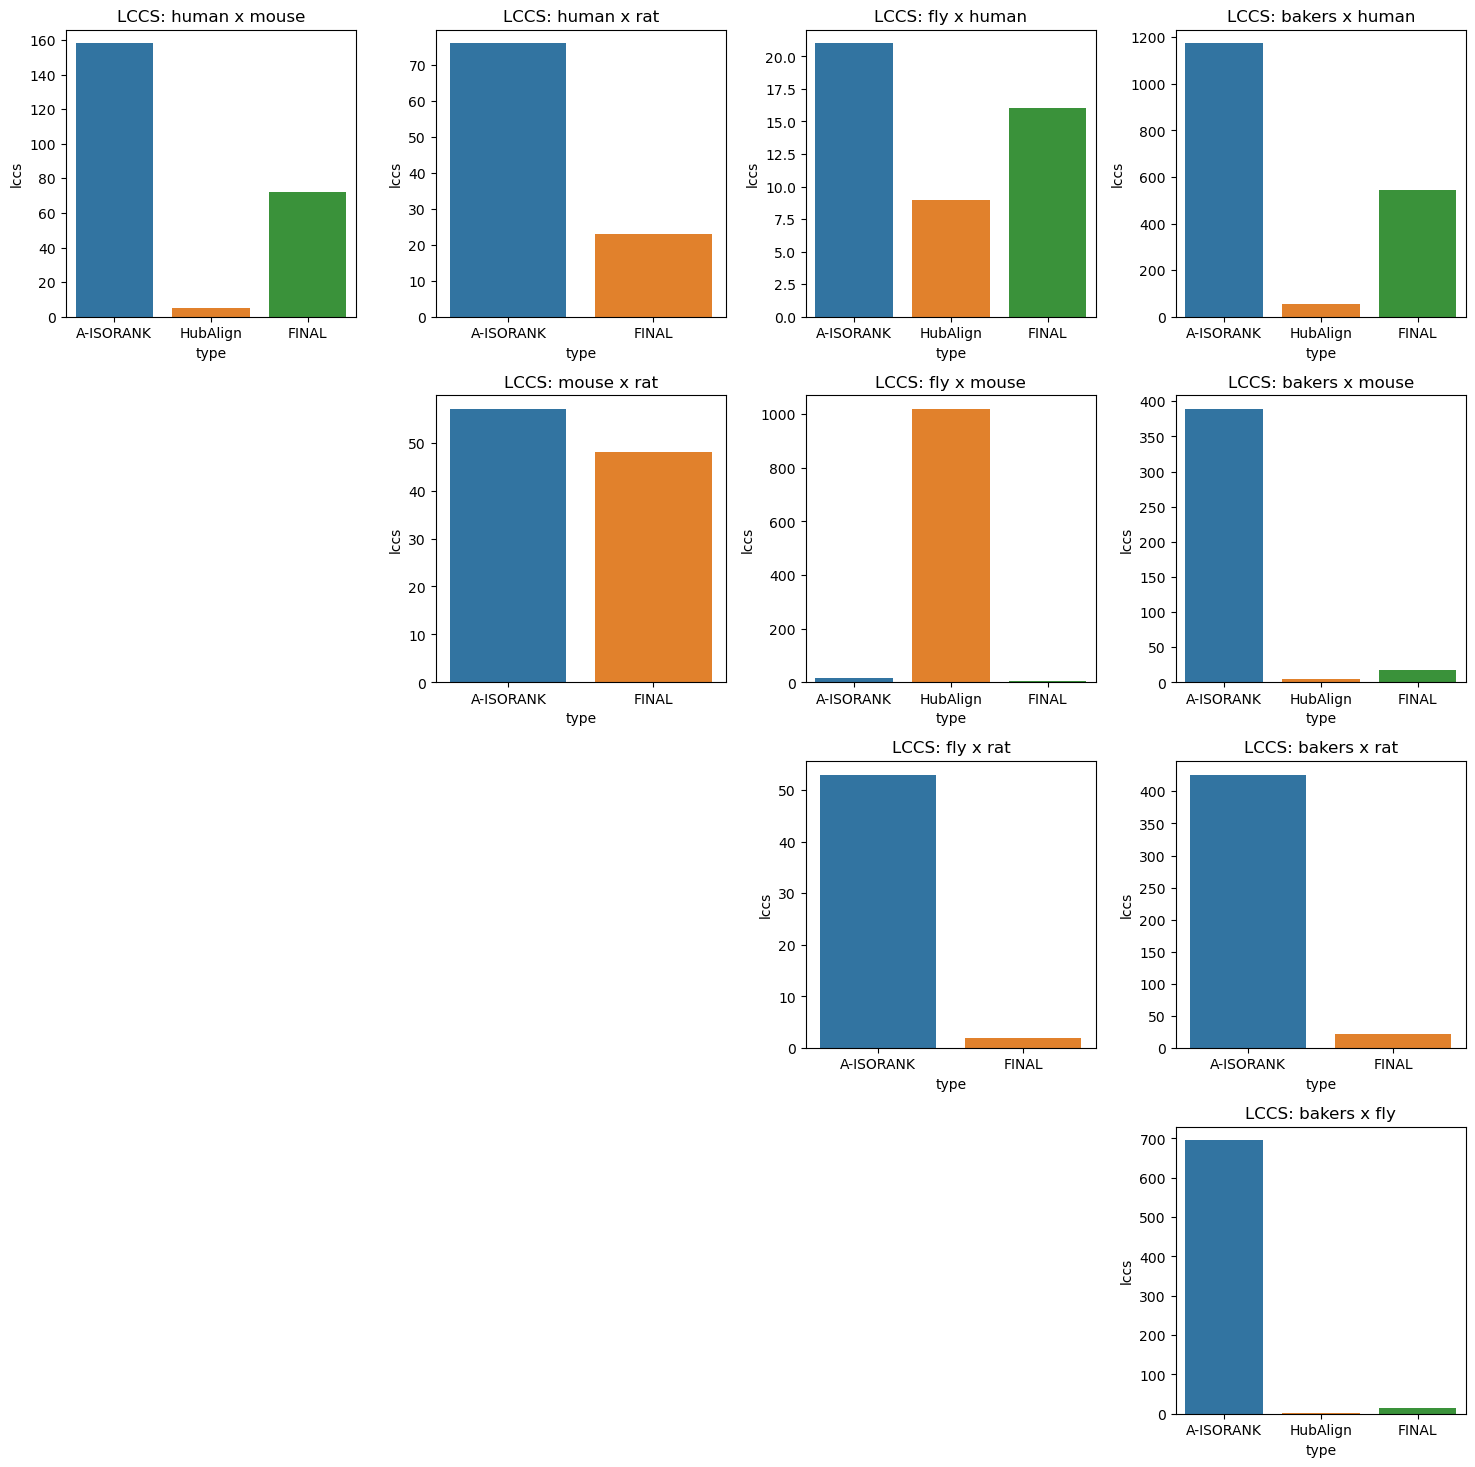

In [53]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(5, 5, figsize=(18, 18))
species = ["human", "mouse", "rat",
          "fly", "bakers"]
for i in range(5):
    for j in range(5):
        if i >= j:
            ax[i, j].set_visible(False)
            continue
        spA = species[i]
        spB = species[j]
        
        if spA > spB:
            spA, spB = spB, spA
        
        dfsp = dfall.loc[dfall.iloc[:, [0,1]].apply(
        lambda x: x["Species A"] == spA and x["Species B"] == spB, axis = 1),
                         :
                        ]
        ax[i, j].set_title(f"LCCS: {spA} x {spB}")
        sns.barplot(dfsp.iloc[:, [3, 8]], x = "type", y = "lccs", ax= ax[i, j])
        
plt.tight_layout()

### Plot Symmetric Substructure

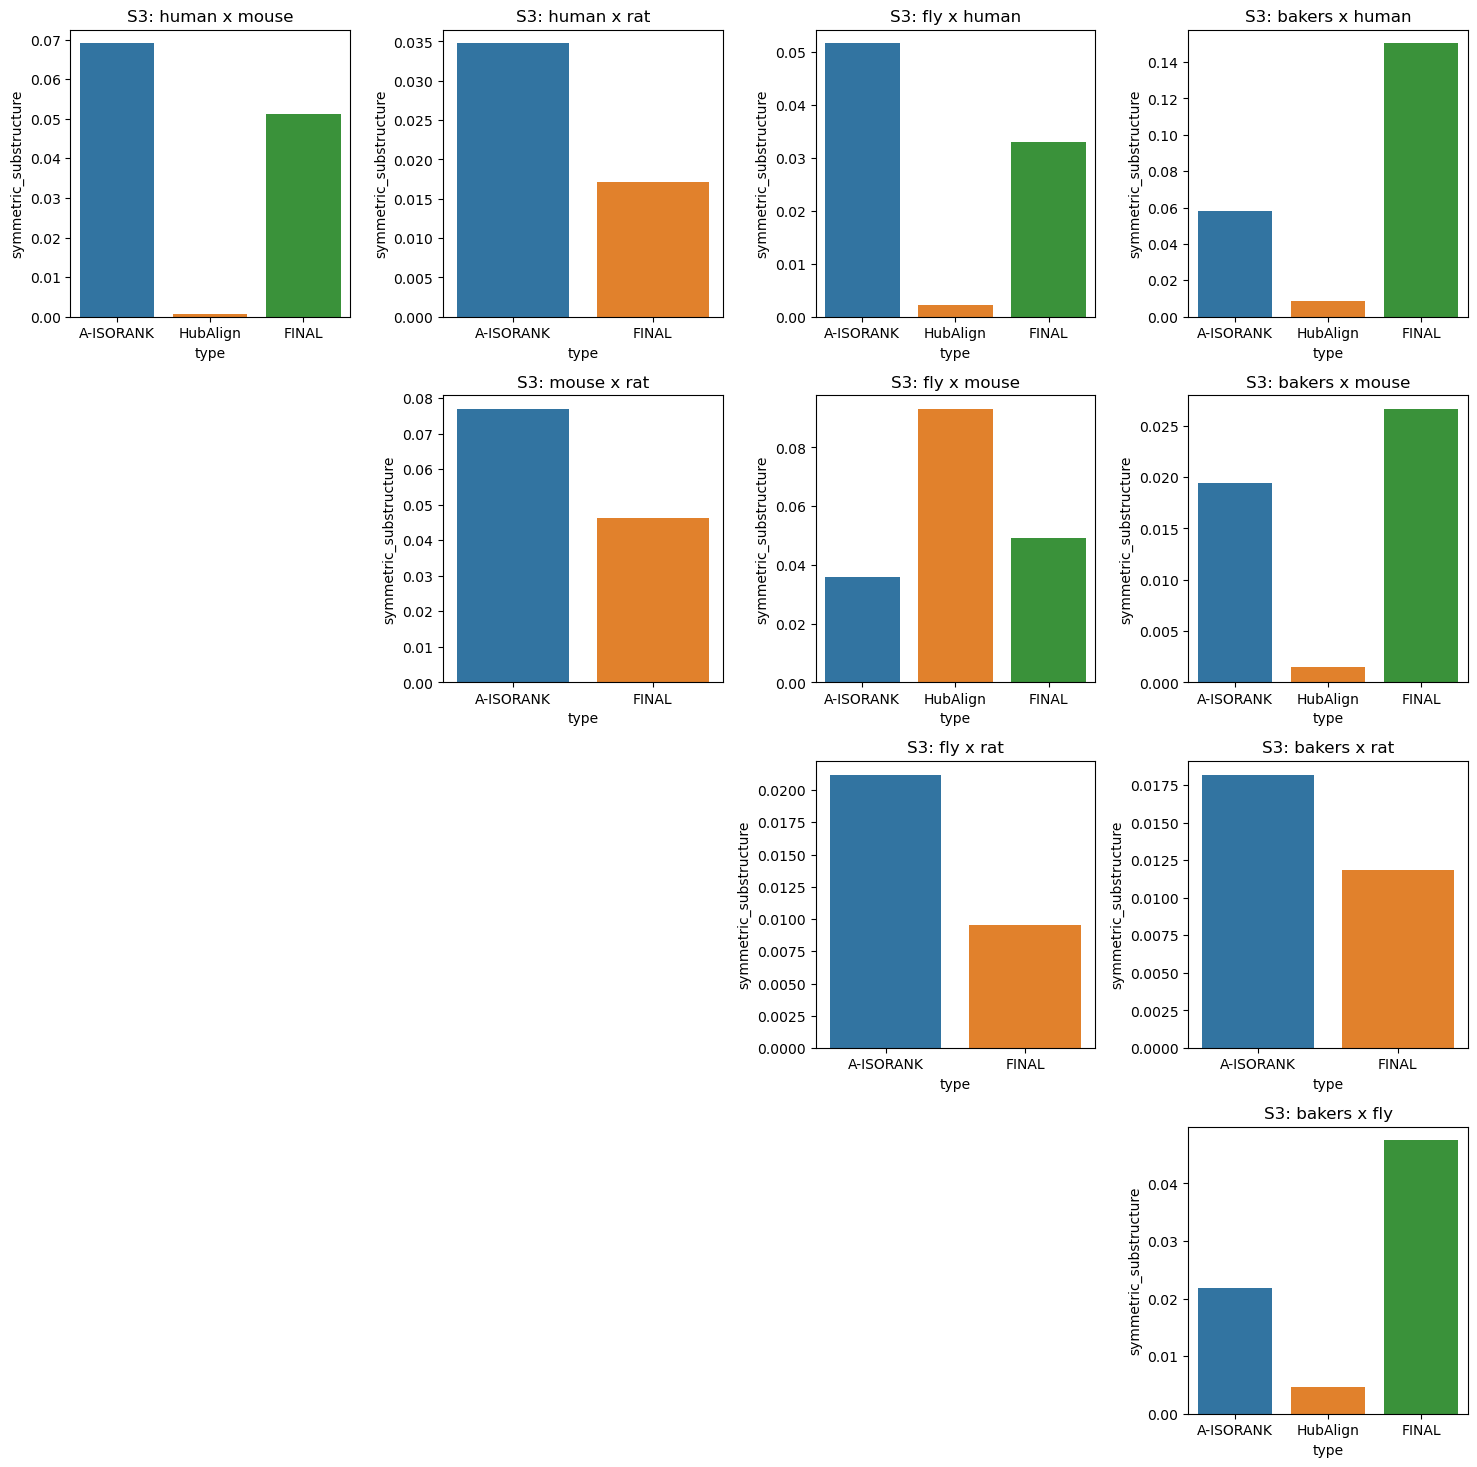

In [54]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(5, 5, figsize=(18, 18))
species = ["human", "mouse", "rat",
          "fly", "bakers"]
for i in range(5):
    for j in range(5):
        if i >= j:
            ax[i, j].set_visible(False)
            continue
        spA = species[i]
        spB = species[j]
        
        if spA > spB:
            spA, spB = spB, spA
        
        dfsp = dfall.loc[dfall.iloc[:, [0,1]].apply(
        lambda x: x["Species A"] == spA and x["Species B"] == spB, axis = 1),
                         :
                        ]
        ax[i, j].set_title(f"S3: {spA} x {spB}")
        sns.barplot(dfsp.iloc[:, [4, 8]], x = "type", y = "symmetric_substructure", ax= ax[i, j])
        
plt.tight_layout()